In [1]:
# import 套件
# BLOCK 1用到的套件
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import os
import cv2
from tqdm import tqdm

# BLOCK 2用到的套件
import random

# BLOCK 5 6 13 14用到的套件
import pickle

# BLOCK 7用到的套件
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

# BLOCK 8 9 10用到的套件
import matplotlib.pyplot as plt

# BLOCK 9用到的套件
from sklearn import svm
from sklearn import datasets

# BLOCK 16用到的套件
import csv

In [2]:
# 路徑位置

#填data training 檔案位置
DATADIR = 'C:/Users/Gavin/Downloads/2021-dilated-pupils/CCLdata/train/'

# 照片大小 長寬100px
IMG_SIZE=100


# 照片分類
CATEGORIES = ["Without_CCL", "With_CCL"]

# X.pickle 會在.ipynb的路徑上
X_pickle_path = 'C:/Windows/System32/0409/X.pickle'

# Y.pickle 會在.ipynb的路徑上
Y_pickle_path = 'C:/Windows/System32/0409/y.pickle'

Z_pickle_path = 'C:/Windows/System32/0409/Z.pickle'

# BLOCK 11 有要測試檔案的位址
# BLOCK 16 有要檔案輸出至csv的位址

In [3]:
# BLOCK 1
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do With_CCL and Without_CCL

        path = os.path.join(DATADIR,category)  # create path to With_CCL and Without_CCL
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=Without_CCL 1=With_CCL

        for img in tqdm(os.listdir(path)):  # iterate over each image per With_CCL and Without_CCL
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass       

create_training_data()
print(len(training_data))

100%|████████████████████████████████████████████████████████████████████████████| 1100/1100 [00:00<00:00, 1516.51it/s]

2200


In [4]:
# BLOCK 2
random.shuffle(training_data)

In [5]:
# BLOCK 3
for sample in training_data[:10]:
    print(sample[1], end=" ")

0 0 1 0 0 1 1 1 1 0 

In [6]:
# BLOCK 4
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

[[[[255]
   [255]
   [255]
   ...
   [127]
   [ 83]
   [112]]

  [[255]
   [255]
   [255]
   ...
   [109]
   [120]
   [126]]

  [[255]
   [255]
   [255]
   ...
   [150]
   [146]
   [143]]

  ...

  [[218]
   [227]
   [229]
   ...
   [173]
   [170]
   [166]]

  [[215]
   [224]
   [227]
   ...
   [173]
   [171]
   [169]]

  [[221]
   [223]
   [223]
   ...
   [176]
   [173]
   [173]]]]


In [7]:
# BLOCK 5
pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [8]:
# BLOCK 6
pickle_in = open(X_pickle_path,"rb")
X = pickle.load(pickle_in)

pickle_in = open(Y_pickle_path,"rb")
y = pickle.load(pickle_in)

In [9]:
# BLOCK 7
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only use the first GPU
  try:
    tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPU")
  except RuntimeError as e:
    # Visible devices must be set before GPUs have been initialized
    print(e)

X = X/255.0

y = np.array(y)

model = Sequential()

model.add(Conv2D(128, (3, 3), input_shape=(IMG_SIZE,IMG_SIZE,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

train_history=model.fit(X, y, batch_size=32, epochs=31, validation_split=0.2)

Epoch 1/31
55/55 [==============================] - 20s 359ms/step - loss: 0.6932 - accuracy: 0.5199 - val_loss: 0.6715 - val_accuracy: 0.6500
Epoch 2/31
55/55 [==============================] - 20s 360ms/step - loss: 0.6508 - accuracy: 0.6295 - val_loss: 0.5445 - val_accuracy: 0.7523
Epoch 3/31
55/55 [==============================] - 20s 363ms/step - loss: 0.4636 - accuracy: 0.8148 - val_loss: 0.4088 - val_accuracy: 0.8455
Epoch 4/31
55/55 [==============================] - 20s 356ms/step - loss: 0.3840 - accuracy: 0.8568 - val_loss: 0.3359 - val_accuracy: 0.8727
Epoch 5/31
55/55 [==============================] - 20s 356ms/step - loss: 0.3203 - accuracy: 0.8824 - val_loss: 0.3042 - val_accuracy: 0.8955
Epoch 6/31
55/55 [==============================] - 20s 360ms/step - loss: 0.3140 - accuracy: 0.8761 - val_loss: 0.3101 - val_accuracy: 0.8750
Epoch 7/31
55/55 [==============================] - 20s 356ms/step - loss: 0.2807 - accuracy: 0.8909 - val_loss: 0.2683 - val_accuracy: 0.8977

In [19]:
# BLOCK 8

def show_train_history(train_acc,validation_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[validation_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left') 

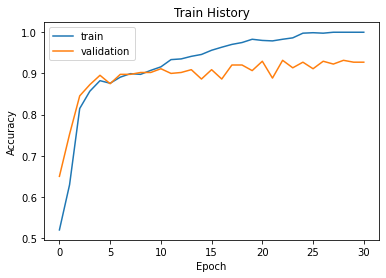

In [20]:
# BLOCK 9
show_train_history('accuracy','val_accuracy')
plt.show()

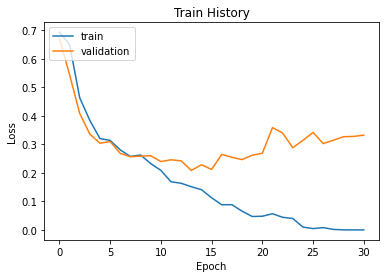

In [21]:
# BLOCK 10
show_train_history('loss','val_loss')
plt.ylabel('Loss')
plt.show()

In [22]:
# BLOCK 11

# 要測試檔案位置
DATADIR_test = 'C:/Users/Gavin/Downloads/2021-dilated-pupils/CCLdata/test'
test_data = []
def create_test_data():
    
        path = os.listdir(DATADIR_test)
        path.sort()
        path.sort(key=lambda x:int(x.split('.')[0]))
       
        for img in tqdm(path): 
            try:
                img_array = cv2.imread(os.path.join(DATADIR_test,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                test_data.append(new_array)  # add this to our test_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass 
create_test_data()
print(len(test_data))

100%|██████████████████████████████████████████████████████████████████████████████| 618/618 [00:00<00:00, 1613.56it/s]

618


In [23]:
# BLOCK 12
Z=[]
for features in test_data:
    Z.append(features)

print(Z[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))
Z = np.array(Z).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

[[[[167]
   [178]
   [177]
   ...
   [255]
   [255]
   [255]]

  [[167]
   [171]
   [170]
   ...
   [255]
   [255]
   [255]]

  [[163]
   [158]
   [172]
   ...
   [255]
   [255]
   [255]]

  ...

  [[187]
   [178]
   [179]
   ...
   [255]
   [255]
   [255]]

  [[184]
   [183]
   [184]
   ...
   [255]
   [255]
   [255]]

  [[184]
   [187]
   [182]
   ...
   [255]
   [255]
   [255]]]]


In [24]:
# BLOCK 13
pickle_out = open("Z.pickle","wb")
pickle.dump(Z, pickle_out)
pickle_out.close()

In [25]:
# BLOCK 14
pickle_in = open(Z_pickle_path,"rb")
Z = pickle.load(pickle_in)
Z_normalize = Z/255.0

In [26]:
# BLOCK 15
prediction=model.predict_classes(Z_normalize)
print(len(prediction))

618


In [27]:
# BLOCK 16 檔案輸出至csv

# csv 輸出檔案位置
csv_output_path = 'C:/Users/Gavin/Downloads/2021-dilated-pupils/CCL_predict.csv'

with open(csv_output_path, 'w', newline='') as csvfile:
    # 建立csv檔寫入器
    writer = csv.writer(csvfile)
    # 寫入一列title
    writer.writerow(['file name','predict result'])

    index = 0
    
    for i in prediction:
        if i == 1:
            writer.writerow([str(index)+'.bmp','1']) #With_CCL
            print(str(index)+'.bmp','With_CCL')
           
        else:
            writer.writerow([str(index)+'.bmp','0']) #Without_CCL
            print(str(index)+'.bmp','Without_CCL')
        index = index + 1

0.bmp Without_CCL
1.bmp Without_CCL
2.bmp Without_CCL
3.bmp Without_CCL
4.bmp Without_CCL
5.bmp With_CCL
6.bmp With_CCL
7.bmp With_CCL
8.bmp With_CCL
9.bmp With_CCL
10.bmp With_CCL
11.bmp Without_CCL
12.bmp With_CCL
13.bmp Without_CCL
14.bmp With_CCL
15.bmp With_CCL
16.bmp Without_CCL
17.bmp With_CCL
18.bmp Without_CCL
19.bmp Without_CCL
20.bmp Without_CCL
21.bmp Without_CCL
22.bmp Without_CCL
23.bmp Without_CCL
24.bmp With_CCL
25.bmp With_CCL
26.bmp Without_CCL
27.bmp Without_CCL
28.bmp Without_CCL
29.bmp Without_CCL
30.bmp With_CCL
31.bmp Without_CCL
32.bmp Without_CCL
33.bmp Without_CCL
34.bmp Without_CCL
35.bmp With_CCL
36.bmp Without_CCL
37.bmp Without_CCL
38.bmp Without_CCL
39.bmp Without_CCL
40.bmp Without_CCL
41.bmp Without_CCL
42.bmp Without_CCL
43.bmp Without_CCL
44.bmp Without_CCL
45.bmp Without_CCL
46.bmp With_CCL
47.bmp With_CCL
48.bmp With_CCL
49.bmp Without_CCL
50.bmp Without_CCL
51.bmp With_CCL
52.bmp With_CCL
53.bmp With_CCL
54.bmp Without_CCL
55.bmp With_CCL
56.bmp Wi